---
回归分析是在一组数据的基础上研究这样几个问题：
1. 建立因变量 $y$ 与自变量 $x_1, x_2, \cdots, x_m$ 之间的回归模型（经验公式）
2. 对回归模型的可信度进行检验
3. 判断每个自变量 $x_i(i=1,2,\cdots,m)$ 对 $y$ 的影响是否显著
4. 诊断回归模型是否适合这组数据
5. 利用回归模型对 $y$ 进行预报或控制

### 10.1.1 一元线性回归分析
#### 1. 一般形式
$$y=\beta_0+\beta_1x+\varepsilon$$
#### 2. 参数的最小二乘估计
$$\hat\beta_1=\dfrac{L_{xy}}{L_{xx}},\ \hat\beta_0=\bar y-\hat\beta_1\bar x$$
式中 $L_{xy}=\sum\limits_{i=1}^n(x_i-\bar x)(y_i-\bar y),\ L_{xx}=\sum\limits_{i=1}^n(x_i-\bar x)^2$

于是，所求的线性回归方程为
$$\hat y=\hat\beta_0+\hat\beta_1x$$

#### 3. 相关性检验，判定系数（拟合优度）和剩余标准差
|  检验参数  |                      计算公式                       |                             解释                             |
| :--------: | :-------------------------------------------------: | :----------------------------------------------------------: |
| $\rm SST$  |   $\sum\limits_{i=1}^n\left(y_i-\bar y\right)^2$    |               总平方和：原始数据的总变异平方和               |
| $ \rm SSR$ | $\sum\limits_{i=1}^n\left(\hat y_i-\bar y\right)^2$ |           回归平方和：用拟合直线可解释的变异平方和           |
| $\rm SSE$  |   $\sum\limits_{i=1}^n\left(y_i-\hat y\right)^2$    |             残差平方和：由与自变量无关的因素引起             |
|   $R^2$    |        $\dfrac{SSR}{SST}=1-\dfrac{SSE}{SST}$        |      判定系数（拟合优度）：可解释的变异占总变异的百分比      |
|    $r$     |        $\dfrac{L_{xy}}{\sqrt{L_{xc}L_{yy}}}$        | 相关系数：反映 $x$ 与 $y$ 的线性关系程度<br />$r=\pm \sqrt{R^2}$，正负号与 $\hat\beta_1$ 一致 |
|    $s$     |              $\sqrt{\dfrac{SSE}{n-m}}$              |          剩余标准差：$m$ 为拟合参数的个数 (这里为2)          |

#### 4. 回归方程的显著性检验
假设 $H_0:\beta_1=0,\ H_1:\beta_1\neq0$

使用检验统计量 $F=\dfrac{\rm SSR}{{\rm SSE}/(n-2)}\sim F(r-1, n-r)$，其中参数个数 $r=2$

决策规则为
$$
\begin{align*}
&F_{0.01}(1, n-2)<F{\text ，线性关系极其显著}\\
&F_{0.05}(1, n-2)<F<F_{0.01}(1, n-2){\text ，线性关系显著}\\
&F<F_{0.05}(1, n-2){\text ，无线性关系}
\end{align*}
$$

### 10.1.2 一元线性回归应用举例

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

In [2]:
def check(data):
    x0, y0 = data[0], data[1]
    mod_dic = {'x': x0, 'y': y0}
    mod = sm.formula.ols('y~x', mod_dic).fit()     # 拟合线性回归模型
    print(mod.summary())
    print(mod.outlier_test())                        # 输出已知数据的野值检验
    print("残差的方差：", mod.mse_resid)
    pre = mod.get_prediction(mod_dic)
    df = pre.summary_frame(alpha=0.05)
    dfv = df.values
    low, upp = dfv[:, 4:].T                         # 置信下限上限
    r = (upp-low)/2                                 # 置信半径
    num = np.arange(1, len(x0)+1)
    plt.errorbar(num, mod.resid, r, fmt='o')
    plt.show()

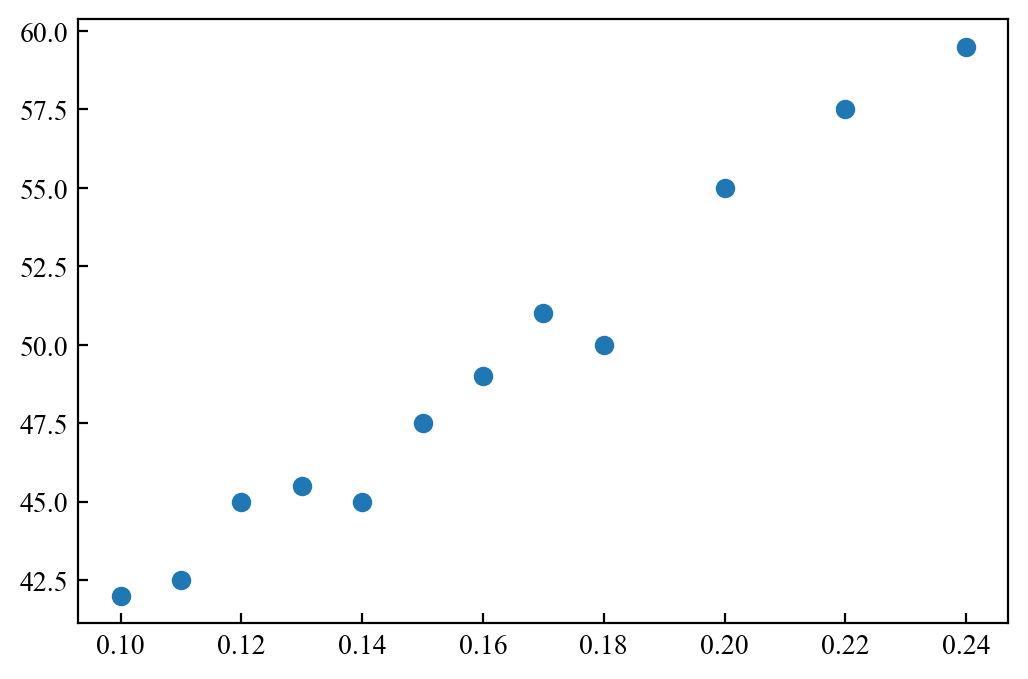

In [3]:
data = np.loadtxt('../../10第10章  回归分析/data10_1.txt')
x0, y0 = data
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x0, y0, 'o')
fig.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     429.2
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.52e-09
Time:                        13:34:06   Log-Likelihood:                -14.758
No. Observations:                  12   AIC:                             33.52
Df Residuals:                      10   BIC:                             34.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4835      1.030     27.648      0.0

/home/zl/anaconda3/envs/mamo/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


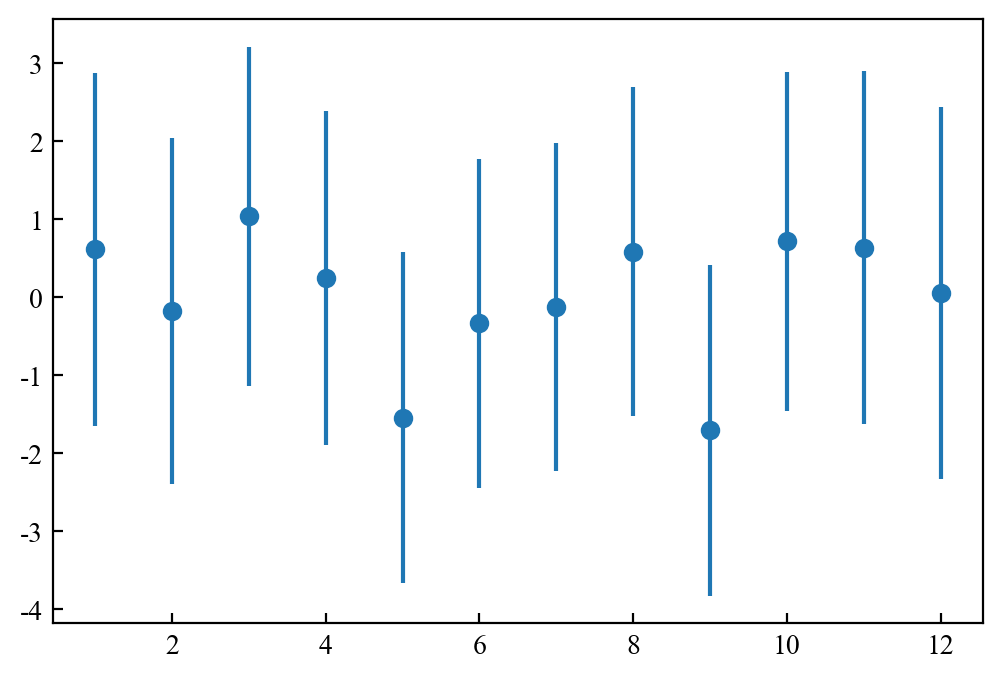

In [4]:
fig = plt.figure()
check(data)

/home/zl/anaconda3/envs/mamo/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     641.6
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.12e-09
Time:                        13:34:06   Log-Likelihood:                -11.253
No. Observations:                  11   AIC:                             26.51
Df Residuals:                       9   BIC:                             27.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.3551      0.847     33.474      0.0

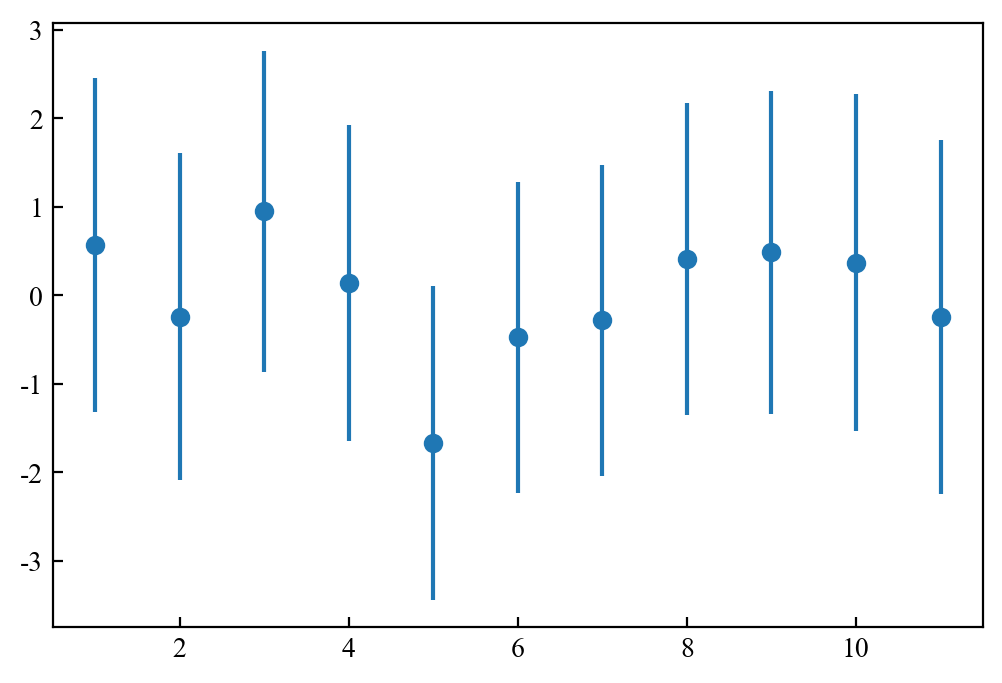

In [5]:
data_1 = np.delete(data, 8, axis=1)
check(data_1)

/home/zl/anaconda3/envs/mamo/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1455.
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           2.45e-10
Time:                        13:34:06   Log-Likelihood:                -5.8084
No. Observations:                  10   AIC:                             15.62
Df Residuals:                       8   BIC:                             16.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7833      0.563     51.135      0.0

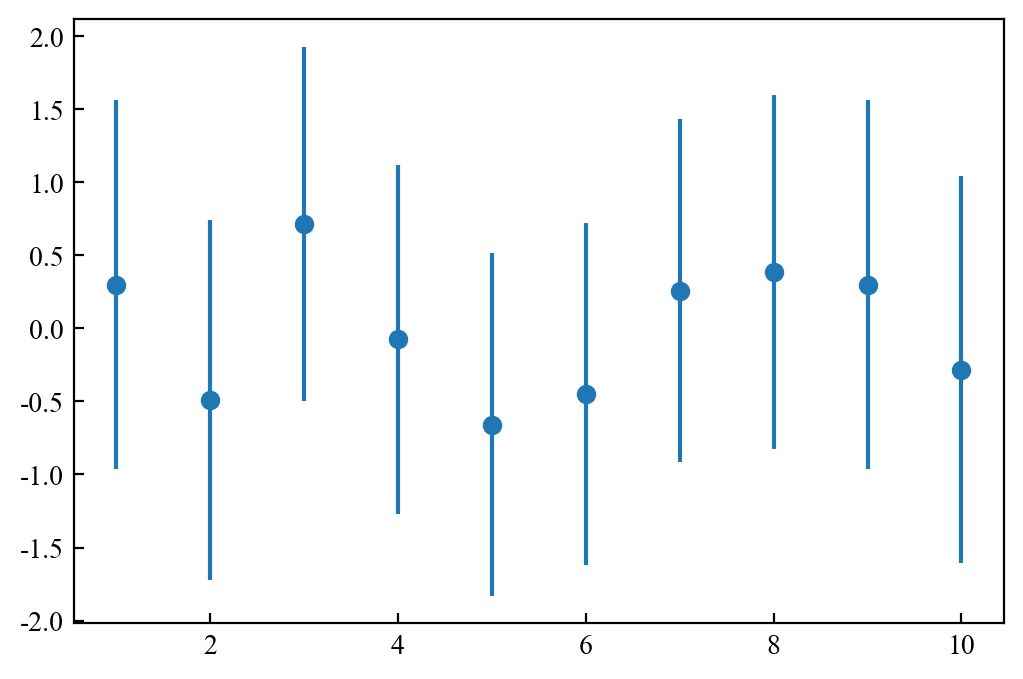

In [6]:
data_2 = np.delete(data_1, 4, axis=1)
check(data_2)